In [98]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def prepare_file_paths(year, category):
    file_names = os.listdir(os.path.join('dataset_nyc_taxi', category, year))
    file_paths = [os.path.join('dataset_nyc_taxi', category, year, file_name) for file_name in file_names]
    return file_paths

In [5]:
months_in_years = {
    '2019' : range(1, 12),
    '2020' : range(12),
    '2021' : range(12),
    '2022' : range(12),
    '2023' : range(12),
}

number_to_month = {
    0: 'January',
    1: 'February',
    2: 'March',
    3: 'April',
    4: 'May',
    5: 'June',
    6: 'July',
    7: 'August',
    8: 'September',
    9: 'October',
    10: 'November',
    11: 'December'
}

In [21]:
categories = ['fhv', 'green', 'yellow']
years = ['2019', '2020', '2021', '2022', '2023']

In [3]:
prepare_file_paths('2020', 'fhv')

['dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-01.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-02.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-03.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-04.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-05.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-06.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-07.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-08.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-09.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-10.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-11.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-12.parquet']

In [4]:
month_df = pd.read_parquet('dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-01.parquet')
month_df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02864,B02864,2020-01-01 00:40:13,2020-01-01 00:43:34,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,1.93,...,2.70,2.75,NaN,0.0,18.25,N,N,,N,N
1,HV0003,B02682,B02682,2020-01-01 00:42:31,2020-01-01 00:46:33,2020-01-01 00:47:50,2020-01-01 00:53:23,114,79,0.81,...,1.31,2.75,NaN,0.0,10.84,N,N,,N,N
2,HV0003,B02764,B02764,2020-01-01 00:01:42,2020-01-01 00:02:06,2020-01-01 00:04:37,2020-01-01 00:21:49,4,125,2.53,...,1.39,2.75,NaN,3.0,11.73,N,N,,N,N
3,HV0003,B02764,B02764,2020-01-01 00:21:23,2020-01-01 00:26:02,2020-01-01 00:26:36,2020-01-01 00:33:00,231,113,1.11,...,0.75,2.75,NaN,0.0,5.84,N,N,,N,N
4,HV0003,B02764,B02764,2020-01-01 00:32:20,2020-01-01 00:37:06,2020-01-01 00:37:49,2020-01-01 00:46:59,114,144,1.10,...,1.03,2.75,NaN,0.0,7.69,N,N,,N,N


In [6]:
month_df.describe()

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,2.056937e+07,43.0,2.056937e+07,2.056937e+07
mean,1.393353e+02,1.418391e+02,4.556780e+00,1.040438e+03,1.701709e+01,8.423652e-01,4.402388e-01,1.405656e+00,9.744287e-01,0.0,6.074975e-01,1.311404e+01
std,7.518385e+01,7.767920e+01,5.415823e+00,7.094020e+02,1.611271e+01,3.417818e+00,4.736847e-01,1.309837e+00,1.261104e+00,0.0,2.186553e+00,1.281221e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.277800e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-1.517200e+02
25%,7.500000e+01,7.500000e+01,1.483000e+00,5.470000e+02,7.720000e+00,0.000000e+00,1.800000e-01,6.400000e-01,0.000000e+00,0.0,0.000000e+00,5.600000e+00
50%,1.400000e+02,1.420000e+02,2.710000e+00,8.600000e+02,1.199000e+01,0.000000e+00,2.900000e-01,1.000000e+00,0.000000e+00,0.0,0.000000e+00,9.610000e+00
75%,2.110000e+02,2.180000e+02,5.478000e+00,1.334000e+03,2.029000e+01,0.000000e+00,5.200000e-01,1.710000e+00,2.750000e+00,0.0,0.000000e+00,1.656000e+01
max,2.650000e+02,2.650000e+02,3.395500e+02,5.048900e+04,1.461660e+03,1.187200e+02,3.707000e+01,7.202000e+01,8.250000e+00,0.0,1.000000e+02,1.054270e+03


In [9]:
month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20569368 entries, 0 to 20569367
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [17]:
weather_df = pd.read_csv('dataset_nyc_taxi\\open-meteo-nyc-2019-2023.csv')
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day ()
0,2019-02-01 00:00:00,-10.4,30,-24.6,-16.1,0.0,0.0,0.0,0.01,1023.6,0,12.1,0
1,2019-02-01 01:00:00,-10.4,30,-24.7,-16.1,0.0,0.0,0.0,0.01,1023.5,1,12.2,0
2,2019-02-01 02:00:00,-10.5,29,-25.1,-16.3,0.0,0.0,0.0,0.01,1023.9,0,12.6,0
3,2019-02-01 03:00:00,-10.8,30,-25.0,-16.5,0.0,0.0,0.0,0.01,1023.9,0,12.2,0
4,2019-02-01 04:00:00,-11.0,31,-24.7,-17.0,0.0,0.0,0.0,0.01,1024.3,2,13.5,0


In [18]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43080 entries, 0 to 43079
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       43080 non-null  datetime64[ns]
 1   temperature_2m (°C)        43080 non-null  float64       
 2   relative_humidity_2m (%)   43080 non-null  int64         
 3   dew_point_2m (°C)          43080 non-null  float64       
 4   apparent_temperature (°C)  43080 non-null  float64       
 5   precipitation (mm)         43080 non-null  float64       
 6   rain (mm)                  43080 non-null  float64       
 7   snowfall (cm)              43080 non-null  float64       
 8   snow_depth (m)             43080 non-null  float64       
 9   surface_pressure (hPa)     43080 non-null  float64       
 10  cloud_cover (%)            43080 non-null  int64         
 11  wind_speed_10m (km/h)      43080 non-null  float64       
 12  is_d

In [89]:
oil_df = pd.read_csv('dataset_nyc_taxi\\oil_prices.csv')
oil_df['date'] = pd.to_datetime(oil_df['date'])
oil_df

,date,retail_price
0,2018-12-31,3.110
1,2019-01-07,3.069
2,2019-01-14,3.049
3,2019-01-21,3.037
4,2019-01-28,3.050
...,...,...
257,2023-12-04,4.139
258,2023-12-11,4.050
259,2023-12-18,3.969
260,2023-12-25,4.022


In [92]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          262 non-null    datetime64[ns]
 1   retail_price  262 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [66]:
pd.read_csv('dataset_nyc_taxi/samples_num_monthly.csv')

,Unnamed: 0,2019 february,2019 march,2019 april,2019 may,2019 june,2019 july,2019 august,2019 september,2019 october,...,2023 march,2023 april,2023 may,2023 june,2023 july,2023 august,2023 september,2023 october,2023 november,2023 december
0,fhv,20159102,23864598,21734822,22329247,21001990,20303312,20126113,20069321,21162290,...,20413539,19144903,19847676,19366619,19132131,18322150,19851123,20186330,19269250,20516297
1,green,615594,643063,567852,545452,506238,470743,449695,449063,476386,...,72044,65392,69174,65550,61343,60649,65471,66177,64025,64215
2,yellow,7049370,7866620,7475949,7598445,6971560,6310419,6073357,6567788,7213891,...,3403766,3288250,3513649,3307234,2907108,2824209,2846722,3522285,3339715,3376567


In [75]:
from tqdm import tqdm

tqdm.pandas()

In [83]:
! pip install pandarallel

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
     -------------------- ------------------ 61.4/116.3 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 116.3/116.3 kB 1.7 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16695 sha256=7a6f5191540da7c8bb8fcfe633de6d5e37a2d074a4aa499f395b77ff8e5c51e0
  Stored in directory: c:\users\miko7\appdata\local\pip\cache\wheels\39\fe\8d\f7912d85b21ea72c9a8a3fefa6141fab92e575a67ab17c4474
Successfully built pandarallel


In [84]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=False, nb_workers=16)

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [95]:
N = 1000
rs = 42

def get_samples_month_by_month(vechicle_type, oil_df, weather_df):
    dfs_to_concat = []
    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in range(len(filepaths)):
            month_df = pd.read_parquet(filepaths[i])
            choosen_df = month_df[month_df['payment_type'] == 1].sample(N, random_state=rs).copy()
            
            choosen_df['nearest_date'] = choosen_df['lpep_pickup_datetime'].parallel_apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
            merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
            merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])
            
            merged_oil_df['nearest_date'] = merged_oil_df['lpep_pickup_datetime'].parallel_apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
            merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
            merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
       
            dfs_to_concat.append(merged_oil_weather_df)
    
    samples_df = pd.concat(dfs_to_concat, ignore_index=True)
            
    return samples_df

In [96]:
choosen_df = get_samples_month_by_month('green', oil_df, weather_df)
choosen_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day ()
0,2,2019-02-01 10:57:01,2019-02-01 11:09:06,N,1.0,35,35,1.0,1.01,9.0,...,-24.9,-15.0,0.0,0.0,0.00,0.01,1025.3,89,9.4,1
1,2,2019-02-27 09:17:36,2019-02-27 09:20:22,N,1.0,145,145,1.0,0.45,4.0,...,-14.4,-8.7,0.1,0.0,0.07,0.00,1025.0,86,3.5,1
2,2,2019-02-17 12:22:50,2019-02-17 12:36:26,N,1.0,92,192,2.0,1.77,10.5,...,-9.0,-3.4,0.0,0.0,0.00,0.00,1014.8,0,5.2,1
3,1,2019-02-15 14:07:33,2019-02-15 14:40:29,N,1.0,226,15,1.0,9.50,32.0,...,2.9,7.1,0.0,0.0,0.00,0.01,998.8,53,20.0,1
4,2,2019-02-07 17:39:20,2019-02-07 17:51:24,N,1.0,166,41,2.0,1.19,9.5,...,3.6,3.2,0.0,0.0,0.00,0.00,1012.1,100,12.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,2,2023-12-08 16:47:08,2023-12-08 16:55:22,N,1.0,75,74,1.0,1.41,10.0,...,2.0,3.7,0.0,0.0,0.00,0.00,1015.7,2,8.7,1
58996,2,2023-12-02 18:08:29,2023-12-02 18:25:22,N,1.0,97,181,2.0,1.27,15.6,...,8.8,9.0,0.0,0.0,0.00,0.00,1009.4,35,8.4,0
58997,2,2023-12-05 18:10:12,2023-12-05 18:20:39,N,1.0,75,263,1.0,1.75,12.1,...,-2.3,0.1,0.0,0.0,0.00,0.00,1009.9,61,7.3,0
58998,2,2023-12-28 22:31:00,2023-12-28 22:53:19,N,5.0,97,36,1.0,5.24,30.0,...,8.5,8.1,0.1,0.1,0.00,0.00,999.6,100,3.4,0


In [64]:
choosen_df['nearest_date'] = choosen_df['lpep_pickup_datetime'].apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])
merged_oil_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,retail_price
0,1,2019-02-09 21:54:16,2019-02-09 22:00:31,N,1.0,95,95,1.0,1.20,6.50,...,0.5,1.55,0.0,NaN,0.3,9.35,1.0,1.0,0.00,3.031
1,2,2019-02-25 14:55:23,2019-02-25 15:03:46,N,1.0,130,215,1.0,1.35,7.50,...,0.5,1.66,0.0,NaN,0.3,9.96,1.0,1.0,0.00,3.094
2,2,2019-02-28 22:15:21,2019-02-28 22:18:48,N,1.0,25,25,1.0,0.58,4.50,...,0.5,1.00,0.0,NaN,0.3,6.80,1.0,1.0,0.00,3.119
3,2,2019-02-20 11:44:12,2019-02-20 12:30:36,N,5.0,130,65,1.0,15.43,51.35,...,0.5,0.00,0.0,NaN,0.0,51.85,1.0,2.0,0.00,3.073
4,2,2019-02-04 19:08:57,2019-02-04 19:36:16,N,1.0,65,188,1.0,3.93,18.50,...,0.5,0.00,0.0,NaN,0.3,20.30,2.0,1.0,0.00,3.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,2,2023-12-07 08:47:12,2023-12-07 09:01:04,N,1.0,166,244,3.0,2.96,17.70,...,0.5,4.80,0.0,NaN,1.0,24.00,1.0,1.0,0.00,4.139
5896,2,2023-12-04 14:11:06,2023-12-04 14:37:15,N,1.0,244,237,1.0,6.39,32.40,...,0.5,0.00,0.0,NaN,1.0,36.65,1.0,1.0,2.75,4.139
5897,2,2023-12-13 08:40:54,2023-12-13 08:44:46,N,1.0,75,75,1.0,0.73,5.80,...,0.5,1.46,0.0,NaN,1.0,8.76,1.0,1.0,0.00,4.050
5898,2,2023-12-04 18:01:05,2023-12-04 18:07:30,N,1.0,43,238,1.0,1.33,8.60,...,0.5,3.07,0.0,NaN,1.0,18.42,1.0,1.0,2.75,4.139


In [61]:
merged_oil_df['nearest_date'] = merged_oil_df['lpep_pickup_datetime'].apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
merged_oil_weather_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day ()
0,1,2019-02-09 21:54:16,2019-02-09 22:00:31,N,1.0,95,95,1.0,1.20,6.50,...,-12.8,-9.6,0.0,0.0,0.00,0.00,1033.9,0,14.5,0
1,2,2019-02-25 14:55:23,2019-02-25 15:03:46,N,1.0,130,215,1.0,1.35,7.50,...,-11.2,-6.0,0.0,0.0,0.00,0.00,1004.9,0,43.0,1
2,2,2019-02-28 22:15:21,2019-02-28 22:18:48,N,1.0,25,25,1.0,0.58,4.50,...,-10.3,-8.2,0.0,0.0,0.00,0.01,1018.6,37,11.2,0
3,2,2019-02-20 11:44:12,2019-02-20 12:30:36,N,5.0,130,65,1.0,15.43,51.35,...,-9.7,-6.4,0.2,0.0,0.14,0.01,1029.5,90,5.1,1
4,2,2019-02-04 19:08:57,2019-02-04 19:36:16,N,1.0,65,188,1.0,3.93,18.50,...,2.7,0.5,0.0,0.0,0.00,0.00,1009.9,1,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,2,2023-12-07 08:47:12,2023-12-07 09:01:04,N,1.0,166,244,3.0,2.96,17.70,...,-6.2,-6.3,0.0,0.0,0.00,0.00,1012.1,77,13.0,1
5896,2,2023-12-04 14:11:06,2023-12-04 14:37:15,N,1.0,244,237,1.0,6.39,32.40,...,2.4,6.1,0.0,0.0,0.00,0.00,1002.0,89,19.9,1
5897,2,2023-12-13 08:40:54,2023-12-13 08:44:46,N,1.0,75,75,1.0,0.73,5.80,...,-3.0,-2.9,0.0,0.0,0.00,0.00,1024.5,0,12.3,1
5898,2,2023-12-04 18:01:05,2023-12-04 18:07:30,N,1.0,43,238,1.0,1.33,8.60,...,0.7,3.5,0.0,0.0,0.00,0.00,1002.6,91,12.6,0


In [62]:
choosen_df.isna().sum()

VendorID                        0
lpep_pickup_datetime            0
lpep_dropoff_datetime           0
store_and_fwd_flag           1249
RatecodeID                   1249
PULocationID                    0
DOLocationID                    0
passenger_count              1249
trip_distance                   0
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
ehail_fee                    5899
improvement_surcharge           0
total_amount                    0
payment_type                 1249
trip_type                    1250
congestion_surcharge         1249
retail_price                    0
temperature_2m (°C)             0
relative_humidity_2m (%)        0
dew_point_2m (°C)               0
apparent_temperature (°C)       0
precipitation (mm)              0
rain (mm)                       0
snowfall (cm)                   0
snow_depth (m)                  0
surface_pressu

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5900 entries, 0 to 5899
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   VendorID                   5900 non-null   int64         
 1   lpep_pickup_datetime       5900 non-null   datetime64[ns]
 2   lpep_dropoff_datetime      5900 non-null   datetime64[ns]
 3   store_and_fwd_flag         4651 non-null   object        
 4   RatecodeID                 4651 non-null   float64       
 5   PULocationID               5900 non-null   int64         
 6   DOLocationID               5900 non-null   int64         
 7   passenger_count            4651 non-null   float64       
 8   trip_distance              5900 non-null   float64       
 9   fare_amount                5900 non-null   float64       
 10  extra                      5900 non-null   float64       
 11  mta_tax                    5900 non-null   float64       
 12  tip_am

In [104]:
choosen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   VendorID                   59000 non-null  int64         
 1   lpep_pickup_datetime       59000 non-null  datetime64[ns]
 2   lpep_dropoff_datetime      59000 non-null  datetime64[ns]
 3   store_and_fwd_flag         59000 non-null  object        
 4   RatecodeID                 59000 non-null  float64       
 5   PULocationID               59000 non-null  int64         
 6   DOLocationID               59000 non-null  int64         
 7   passenger_count            59000 non-null  float64       
 8   trip_distance              59000 non-null  float64       
 9   fare_amount                59000 non-null  float64       
 10  extra                      59000 non-null  float64       
 11  mta_tax                    59000 non-null  float64       
 12  tip_

C:\Users\Miko7\AppData\Local\Temp\ipykernel_24716\4065714790.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = choosen_df.corr()


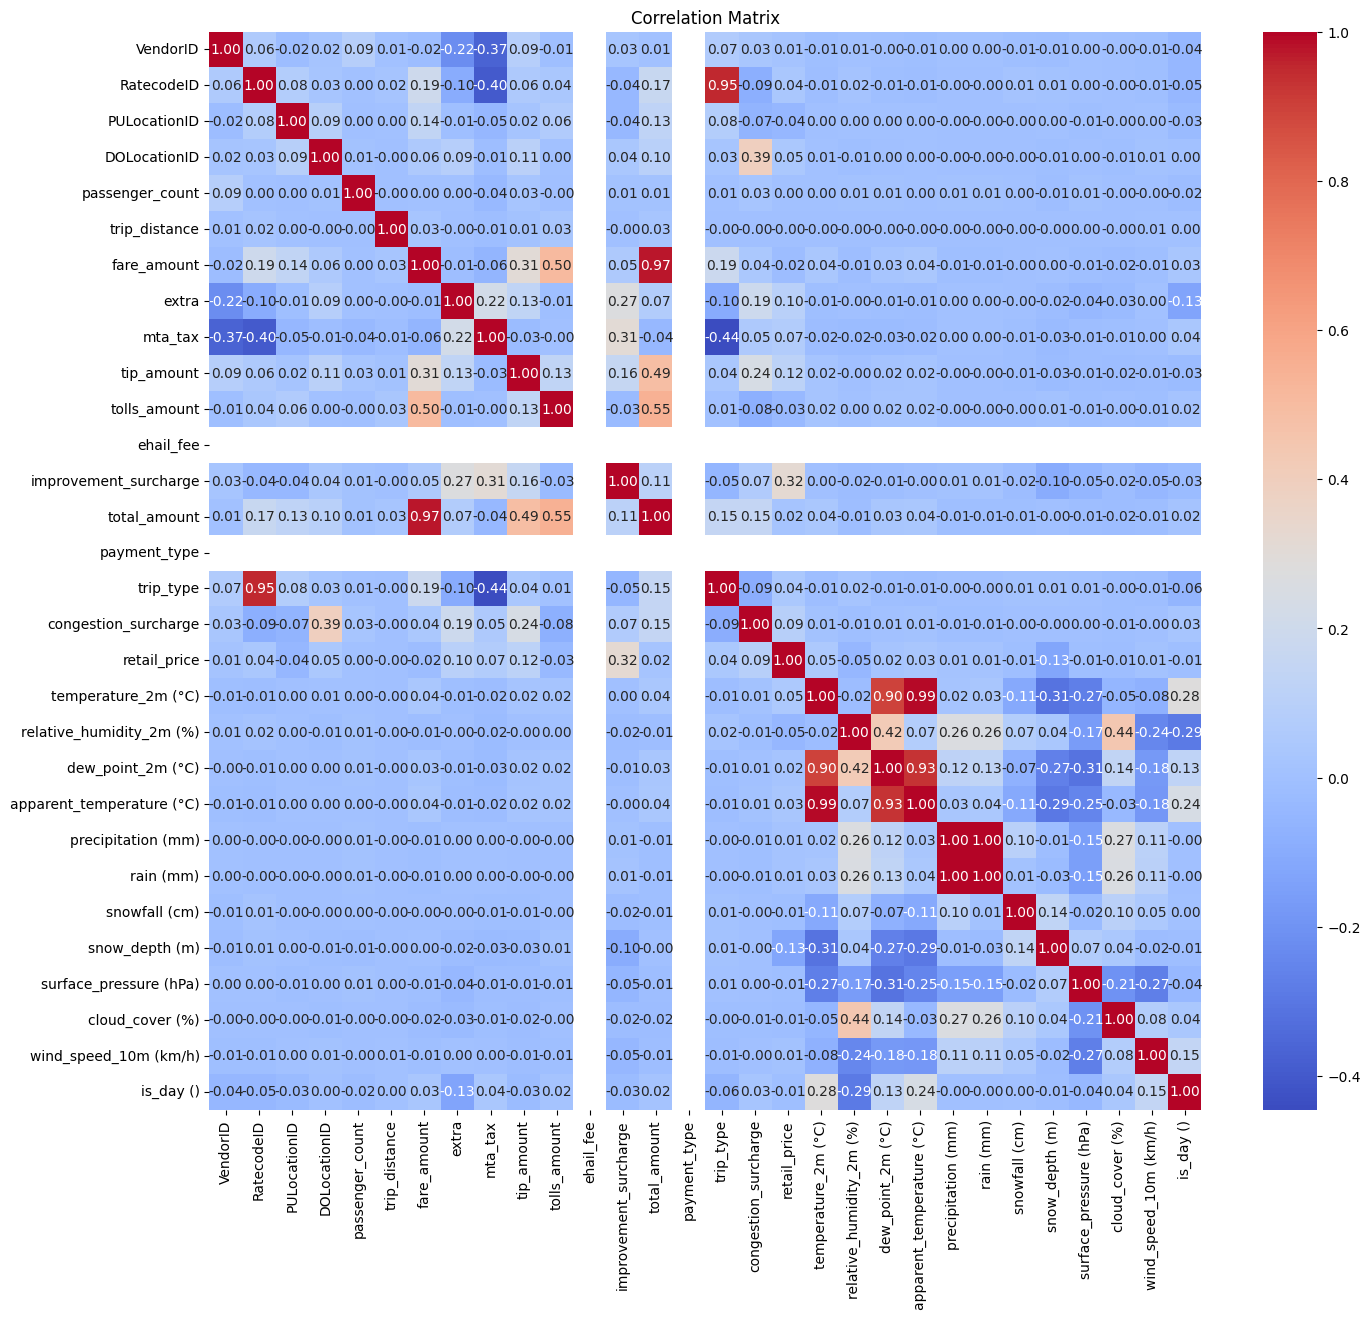

In [99]:
correlation_matrix = choosen_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [100]:
choosen_df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'retail_price', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'is_day ()'],
      dtype='object')

In [ ]:
! pip install missingno

<Axes: >

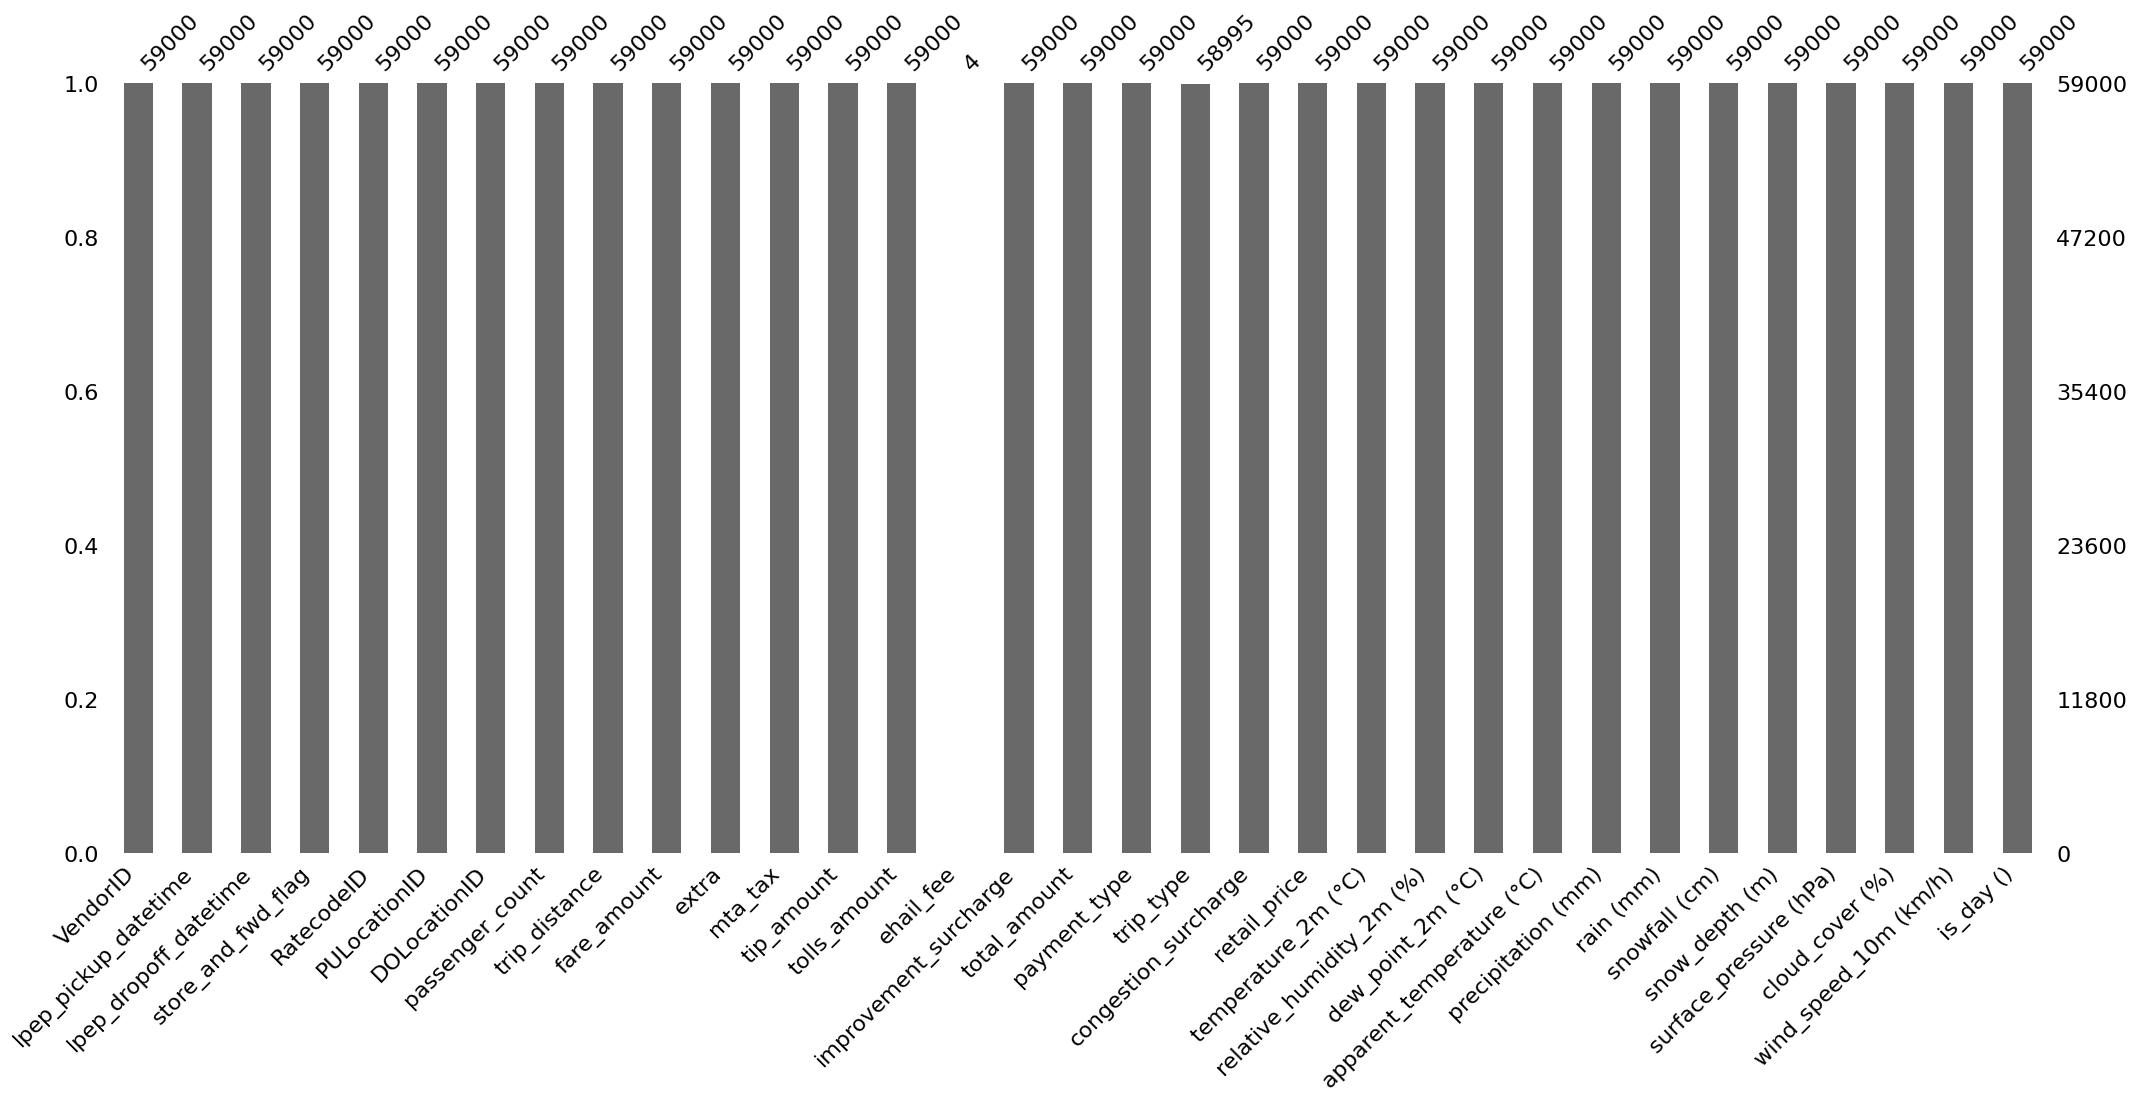

In [103]:
import missingno as msno

msno.bar(choosen_df)

In [106]:
green_sample_df = choosen_df[['tip_amount', 'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
       'tolls_amount', 'improvement_surcharge',
       'total_amount', 'trip_type', 'congestion_surcharge',
       'retail_price', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'apparent_temperature (°C)', 'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'is_day ()']]

C:\Users\Miko7\AppData\Local\Temp\ipykernel_24716\634438081.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = green_sample_df.corr()


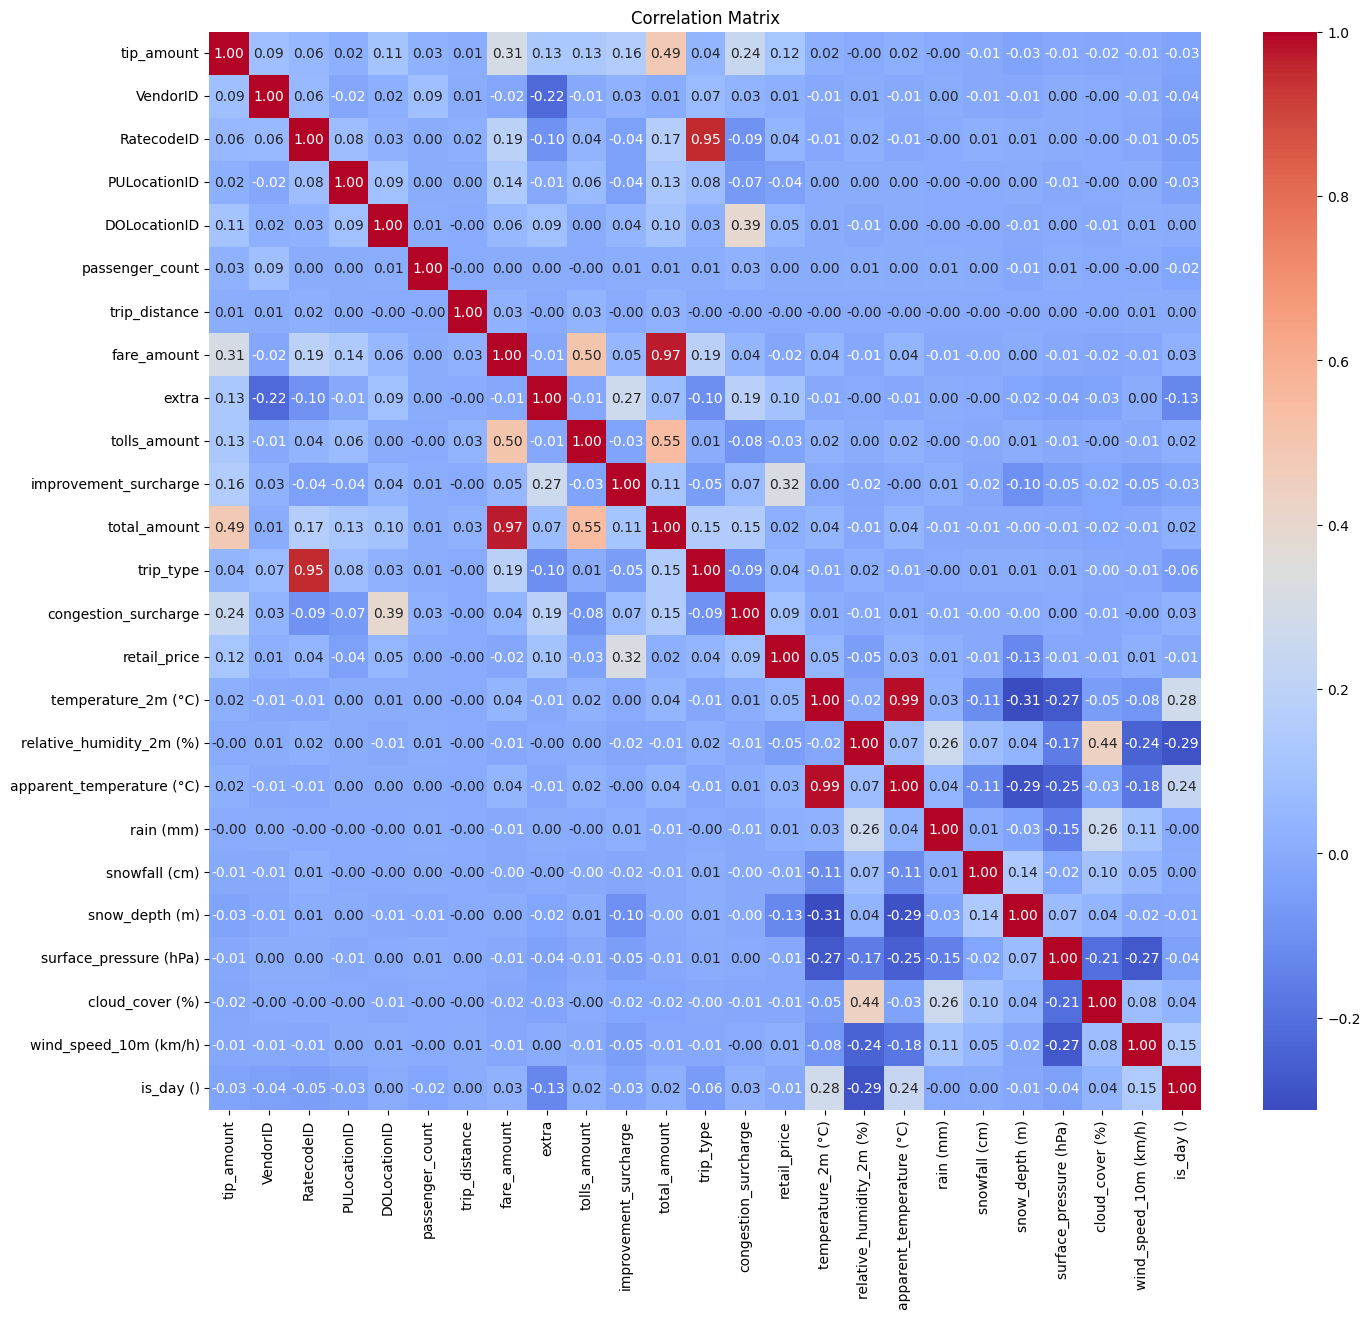

In [107]:
correlation_matrix = green_sample_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [111]:
green_sample_df['year'] = green_sample_df['lpep_pickup_datetime'].dt.year
green_sample_df['month'] = green_sample_df['lpep_pickup_datetime'].dt.month
green_sample_df['weekday'] = green_sample_df['lpep_pickup_datetime'].dt.weekday
green_sample_df['hour'] = green_sample_df['lpep_pickup_datetime'].dt.hour
green_sample_df

C:\Users\Miko7\AppData\Local\Temp\ipykernel_24716\139812122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_sample_df['year'] = green_sample_df['lpep_pickup_datetime'].dt.year
C:\Users\Miko7\AppData\Local\Temp\ipykernel_24716\139812122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_sample_df['month'] = green_sample_df['lpep_pickup_datetime'].dt.month
C:\Users\Miko7\AppData\Local\Temp\ipykernel_24716\139812122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,tip_amount,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day (),year,month,weekday,hour
0,0.00,2,2019-02-01 10:57:01,2019-02-01 11:09:06,N,1.0,35,35,1.0,1.01,...,0.00,0.01,1025.3,89,9.4,1,2019,2,4,10
1,1.20,2,2019-02-27 09:17:36,2019-02-27 09:20:22,N,1.0,145,145,1.0,0.45,...,0.07,0.00,1025.0,86,3.5,1,2019,2,2,9
2,3.39,2,2019-02-17 12:22:50,2019-02-17 12:36:26,N,1.0,92,192,2.0,1.77,...,0.00,0.00,1014.8,0,5.2,1,2019,2,6,12
3,10.00,1,2019-02-15 14:07:33,2019-02-15 14:40:29,N,1.0,226,15,1.0,9.50,...,0.00,0.01,998.8,53,20.0,1,2019,2,4,14
4,1.00,2,2019-02-07 17:39:20,2019-02-07 17:51:24,N,1.0,166,41,2.0,1.19,...,0.00,0.00,1012.1,100,12.3,1,2019,2,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,2.80,2,2023-12-08 16:47:08,2023-12-08 16:55:22,N,1.0,75,74,1.0,1.41,...,0.00,0.00,1015.7,2,8.7,1,2023,12,4,16
58996,3.42,2,2023-12-02 18:08:29,2023-12-02 18:25:22,N,1.0,97,181,2.0,1.27,...,0.00,0.00,1009.4,35,8.4,0,2023,12,5,18
58997,3.77,2,2023-12-05 18:10:12,2023-12-05 18:20:39,N,1.0,75,263,1.0,1.75,...,0.00,0.00,1009.9,61,7.3,0,2023,12,1,18
58998,6.20,2,2023-12-28 22:31:00,2023-12-28 22:53:19,N,5.0,97,36,1.0,5.24,...,0.00,0.00,999.6,100,3.4,0,2023,12,3,22


In [124]:
green_sample_df['trip_time'] = green_sample_df['lpep_dropoff_datetime'] - green_sample_df['lpep_pickup_datetime'] 
green_sample_df

,tip_amount,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day (),year,month,weekday,hour,trip_time
0,0.00,2,2019-02-01 10:57:01,2019-02-01 11:09:06,N,1.0,35,35,1.0,1.01,...,0.01,1025.3,89,9.4,1,2019,2,4,10,0 days 00:12:05
1,1.20,2,2019-02-27 09:17:36,2019-02-27 09:20:22,N,1.0,145,145,1.0,0.45,...,0.00,1025.0,86,3.5,1,2019,2,2,9,0 days 00:02:46
2,3.39,2,2019-02-17 12:22:50,2019-02-17 12:36:26,N,1.0,92,192,2.0,1.77,...,0.00,1014.8,0,5.2,1,2019,2,6,12,0 days 00:13:36
3,10.00,1,2019-02-15 14:07:33,2019-02-15 14:40:29,N,1.0,226,15,1.0,9.50,...,0.01,998.8,53,20.0,1,2019,2,4,14,0 days 00:32:56
4,1.00,2,2019-02-07 17:39:20,2019-02-07 17:51:24,N,1.0,166,41,2.0,1.19,...,0.00,1012.1,100,12.3,1,2019,2,3,17,0 days 00:12:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,2.80,2,2023-12-08 16:47:08,2023-12-08 16:55:22,N,1.0,75,74,1.0,1.41,...,0.00,1015.7,2,8.7,1,2023,12,4,16,0 days 00:08:14
58996,3.42,2,2023-12-02 18:08:29,2023-12-02 18:25:22,N,1.0,97,181,2.0,1.27,...,0.00,1009.4,35,8.4,0,2023,12,5,18,0 days 00:16:53
58997,3.77,2,2023-12-05 18:10:12,2023-12-05 18:20:39,N,1.0,75,263,1.0,1.75,...,0.00,1009.9,61,7.3,0,2023,12,1,18,0 days 00:10:27
58998,6.20,2,2023-12-28 22:31:00,2023-12-28 22:53:19,N,5.0,97,36,1.0,5.24,...,0.00,999.6,100,3.4,0,2023,12,3,22,0 days 00:22:19


![](https://external-preview.redd.it/KrgUZnsqEjnJRXNxYRQuTtjnzsa8Xp-1uzRcxzdaHIM.jpg?auto=webp&s=e129136be1af10922bbc27fef2e8fc719bd0e383)

In [129]:
def timedelta_to_seconds(td):
    return td.total_seconds()

green_sample_df['trip_time'] = green_sample_df['trip_time'].apply(timedelta_to_seconds)
green_sample_df

,tip_amount,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day (),year,month,weekday,hour,trip_time
0,0.00,2,2019-02-01 10:57:01,2019-02-01 11:09:06,N,1.0,35,35,1.0,1.01,...,0.01,1025.3,89,9.4,1,2019,2,4,10,725.0
1,1.20,2,2019-02-27 09:17:36,2019-02-27 09:20:22,N,1.0,145,145,1.0,0.45,...,0.00,1025.0,86,3.5,1,2019,2,2,9,166.0
2,3.39,2,2019-02-17 12:22:50,2019-02-17 12:36:26,N,1.0,92,192,2.0,1.77,...,0.00,1014.8,0,5.2,1,2019,2,6,12,816.0
3,10.00,1,2019-02-15 14:07:33,2019-02-15 14:40:29,N,1.0,226,15,1.0,9.50,...,0.01,998.8,53,20.0,1,2019,2,4,14,1976.0
4,1.00,2,2019-02-07 17:39:20,2019-02-07 17:51:24,N,1.0,166,41,2.0,1.19,...,0.00,1012.1,100,12.3,1,2019,2,3,17,724.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58995,2.80,2,2023-12-08 16:47:08,2023-12-08 16:55:22,N,1.0,75,74,1.0,1.41,...,0.00,1015.7,2,8.7,1,2023,12,4,16,494.0
58996,3.42,2,2023-12-02 18:08:29,2023-12-02 18:25:22,N,1.0,97,181,2.0,1.27,...,0.00,1009.4,35,8.4,0,2023,12,5,18,1013.0
58997,3.77,2,2023-12-05 18:10:12,2023-12-05 18:20:39,N,1.0,75,263,1.0,1.75,...,0.00,1009.9,61,7.3,0,2023,12,1,18,627.0
58998,6.20,2,2023-12-28 22:31:00,2023-12-28 22:53:19,N,5.0,97,36,1.0,5.24,...,0.00,999.6,100,3.4,0,2023,12,3,22,1339.0


C:\Users\Miko7\AppData\Local\Temp\ipykernel_24716\634438081.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = green_sample_df.corr()


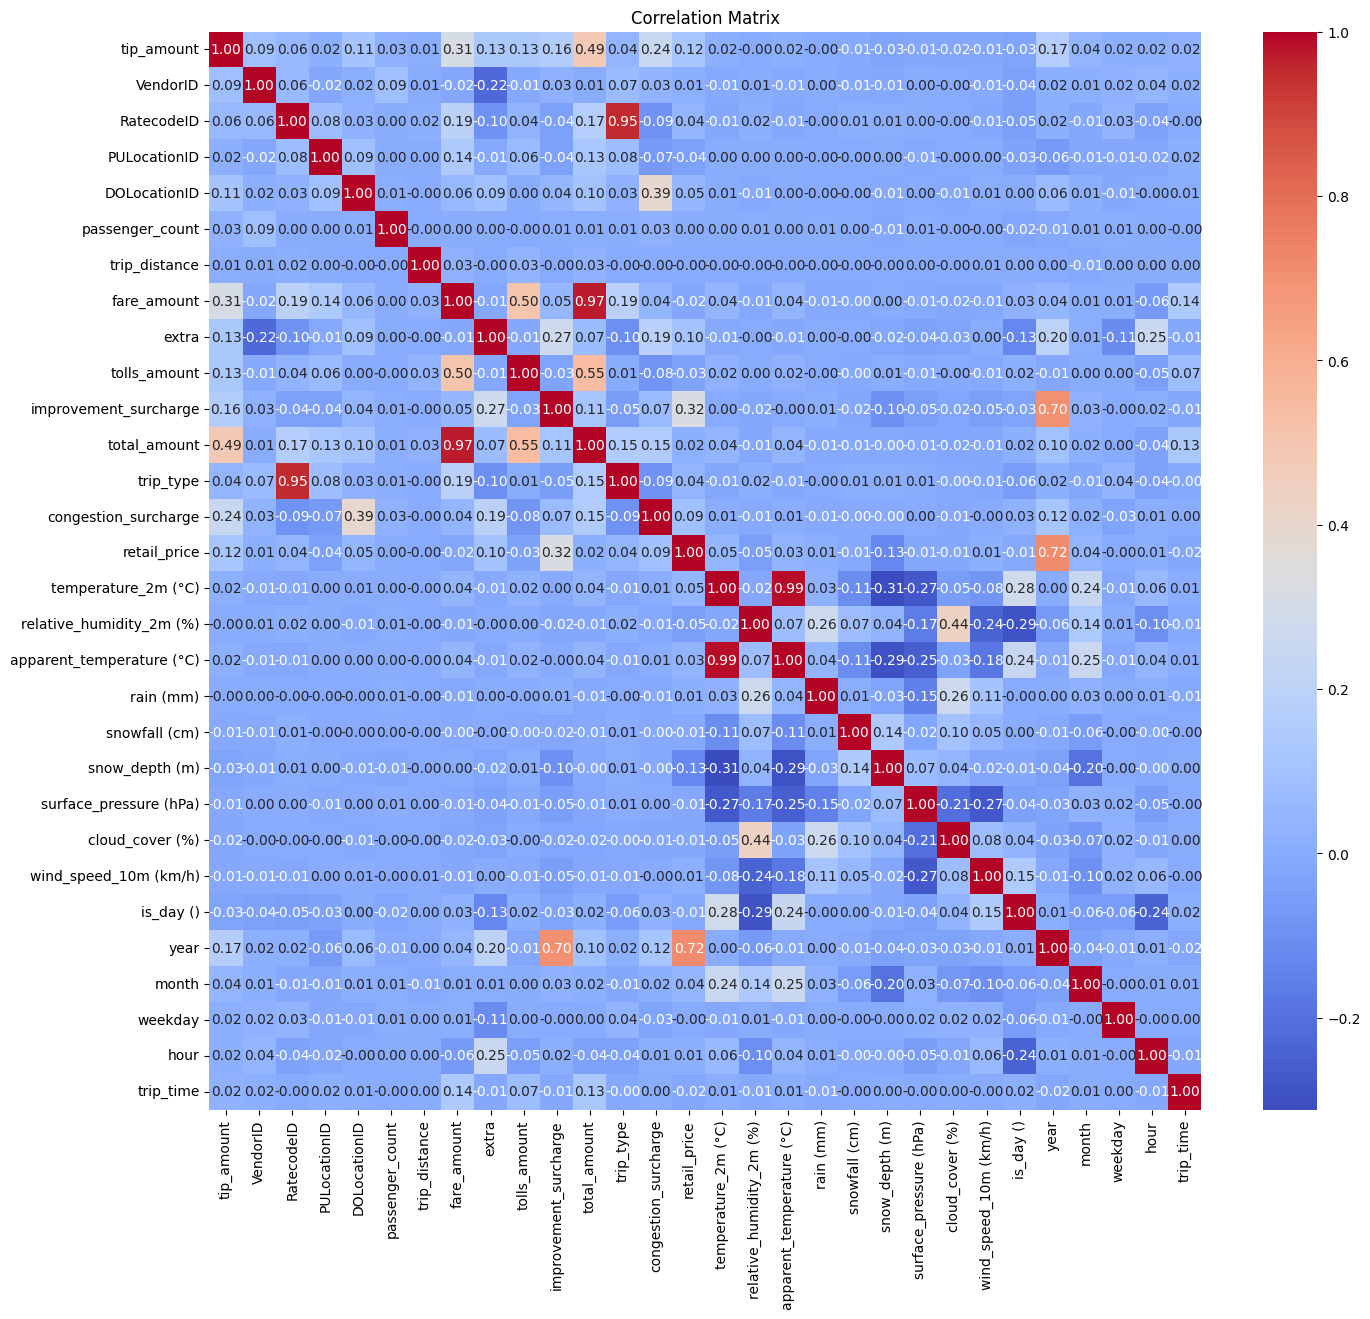

In [130]:
correlation_matrix = green_sample_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [132]:
N = 10000
rs = 42

def get_samples_month_by_month_yellow(vechicle_type, oil_df, weather_df):
    dfs_to_concat = []
    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in range(len(filepaths)):
            month_df = pd.read_parquet(filepaths[i])
            choosen_df = month_df[month_df['payment_type'] == 1].sample(N, random_state=rs).copy()
            
            choosen_df['nearest_date'] = choosen_df['tpep_pickup_datetime'].parallel_apply(lambda x: oil_df.iloc[(oil_df['date']-x).abs().argsort()[:1]]['date'].values[0])
            merged_oil_df = pd.merge(choosen_df, oil_df, how='left', left_on='nearest_date', right_on='date')
            merged_oil_df = merged_oil_df.drop(columns = ['nearest_date', 'date'])
            
            merged_oil_df['nearest_date'] = merged_oil_df['tpep_pickup_datetime'].parallel_apply(lambda x: weather_df.iloc[(weather_df['time']-x).abs().argsort()[:1]]['time'].values[0])
            merged_oil_weather_df = pd.merge(merged_oil_df, weather_df, how='left', left_on='nearest_date', right_on='time')
            merged_oil_weather_df = merged_oil_weather_df.drop(columns = ['nearest_date', 'time'])
       
            dfs_to_concat.append(merged_oil_weather_df)
    
    samples_df = pd.concat(dfs_to_concat, ignore_index=True)
            
    return samples_df

In [133]:
choosen_df = get_samples_month_by_month_yellow('yellow', oil_df, weather_df)
choosen_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (km/h),is_day (),Airport_fee
0,2,2019-02-12 07:05:00,2019-02-12 07:16:54,1.0,2.51,1.0,N,79,161,1,...,-8.9,0.0,0.0,0.0,0.01,1022.2,90,19.5,0,NaN
1,1,2019-02-27 18:58:08,2019-02-27 19:19:19,1.0,4.30,1.0,N,143,114,1,...,-7.9,0.0,0.0,0.0,0.00,1014.9,100,15.6,0,NaN
2,2,2019-02-23 03:00:16,2019-02-23 03:12:22,1.0,1.24,1.0,N,148,148,1,...,-5.9,0.0,0.0,0.0,0.02,1025.9,30,9.6,0,NaN
3,2,2019-02-05 16:46:58,2019-02-05 17:09:22,1.0,2.76,1.0,N,164,142,1,...,14.7,0.0,0.0,0.0,0.00,1007.7,2,10.3,1,NaN
4,1,2019-02-25 19:40:28,2019-02-25 19:49:16,2.0,1.40,1.0,N,107,211,1,...,-6.0,0.0,0.0,0.0,0.00,1012.2,1,23.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589995,1,2023-12-14 04:51:00,2023-12-14 05:20:24,1.0,7.10,99.0,N,51,116,1,...,-6.8,0.0,0.0,0.0,0.00,1030.4,13,9.8,0,0.00
589996,1,2023-12-06 18:14:27,2023-12-06 18:31:10,1.0,0.80,1.0,N,107,90,1,...,-3.2,0.0,0.0,0.0,0.00,1009.3,48,18.6,0,0.00
589997,2,2023-12-09 15:40:05,2023-12-09 16:41:40,2.0,17.95,2.0,N,132,186,1,...,11.2,0.0,0.0,0.0,0.00,1014.5,29,7.1,1,1.75
589998,2,2023-12-03 13:23:25,2023-12-03 13:28:41,1.0,0.70,1.0,N,79,79,1,...,6.7,2.7,2.7,0.0,0.00,1001.8,100,18.0,1,0.00


In [134]:
! pip install geopandas

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.1 MB 1.1 MB/s eta 0:00:01
     -------- ------------------------------- 0.2/1.1 MB 2.5 MB/s eta 0:00:01
     ----------------- ---------------------- 0.5/1.1 MB 3.4 MB/s eta 0:00:01
     --------------------------- ------------ 0.8/1.1 MB 4.4 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
     ---- ----------------------------------- 0.8/6.1 MB 46.7 MB/s eta 0:00:01
     ------------------ --------------------- 2.8/6.1 MB 30.0 MB/s eta 0:00:01
     ---------------------------------------  6.1/6.1 MB 48.6 MB/s eta 0:00:01
     ---------------------------------------- 6.1/6.1 MB 43.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------------------------------------- 1.4/1.4 MB 44.7 MB/s eta 0:00:00
  

In [135]:
import geopandas as gpd

shapefile = gpd.read_file("taxi_zones")

location_to_borough_mapping = dict(zip(shapefile['LocationID'], shapefile['borough']))
choosen_df["PULocationBorough"] = choosen_df.PULocationID.map(location_to_borough_mapping)
choosen_df["DOLocationBorough"] = choosen_df.DOLocationID.map(location_to_borough_mapping)

In [136]:
choosen_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'Airport_fee',
       'PULocationBorough', 'DOLocationBorough'],
      dtype='object')

In [137]:
choosen_df['year'] = choosen_df['tpep_pickup_datetime'].dt.year
choosen_df['month'] = choosen_df['tpep_pickup_datetime'].dt.month
choosen_df['weekday'] = choosen_df['tpep_pickup_datetime'].dt.weekday
choosen_df['hour'] = choosen_df['tpep_pickup_datetime'].dt.hour

choosen_df['trip_time'] = choosen_df['tpep_dropoff_datetime'] - choosen_df['tpep_pickup_datetime'] 

def timedelta_to_seconds(td):
    return td.total_seconds()

choosen_df['trip_time'] = choosen_df['trip_time'].apply(timedelta_to_seconds)
choosen_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,wind_speed_10m (km/h),is_day (),Airport_fee,PULocationBorough,DOLocationBorough,year,month,weekday,hour,trip_time
0,2,2019-02-12 07:05:00,2019-02-12 07:16:54,1.0,2.51,1.0,N,79,161,1,...,19.5,0,NaN,Manhattan,Manhattan,2019,2,1,7,714.0
1,1,2019-02-27 18:58:08,2019-02-27 19:19:19,1.0,4.30,1.0,N,143,114,1,...,15.6,0,NaN,Manhattan,Manhattan,2019,2,2,18,1271.0
2,2,2019-02-23 03:00:16,2019-02-23 03:12:22,1.0,1.24,1.0,N,148,148,1,...,9.6,0,NaN,Manhattan,Manhattan,2019,2,5,3,726.0
3,2,2019-02-05 16:46:58,2019-02-05 17:09:22,1.0,2.76,1.0,N,164,142,1,...,10.3,1,NaN,Manhattan,Manhattan,2019,2,1,16,1344.0
4,1,2019-02-25 19:40:28,2019-02-25 19:49:16,2.0,1.40,1.0,N,107,211,1,...,23.8,0,NaN,Manhattan,Manhattan,2019,2,0,19,528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589995,1,2023-12-14 04:51:00,2023-12-14 05:20:24,1.0,7.10,99.0,N,51,116,1,...,9.8,0,0.00,Bronx,Manhattan,2023,12,3,4,1764.0
589996,1,2023-12-06 18:14:27,2023-12-06 18:31:10,1.0,0.80,1.0,N,107,90,1,...,18.6,0,0.00,Manhattan,Manhattan,2023,12,2,18,1003.0
589997,2,2023-12-09 15:40:05,2023-12-09 16:41:40,2.0,17.95,2.0,N,132,186,1,...,7.1,1,1.75,Queens,Manhattan,2023,12,5,15,3695.0
589998,2,2023-12-03 13:23:25,2023-12-03 13:28:41,1.0,0.70,1.0,N,79,79,1,...,18.0,1,0.00,Manhattan,Manhattan,2023,12,6,13,316.0


In [139]:
choosen_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'Airport_fee',
       'PULocationBorough', 'DOLocationBorough', 'year', 'month', 'weekday',
       'hour', 'trip_time'],
      dtype='object')

In [140]:
choosen_df_sel = choosen_df[['tip_amount', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'fare_amount', 'extra',
       'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'retail_price',
       'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'apparent_temperature (°C)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'is_day ()', 'Airport_fee',
       'PULocationBorough', 'DOLocationBorough', 'year', 'month', 'weekday',
       'hour', 'trip_time']]

In [142]:
choosen_df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590000 entries, 0 to 589999
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   tip_amount                 590000 non-null  float64       
 1   VendorID                   590000 non-null  int64         
 2   tpep_pickup_datetime       590000 non-null  datetime64[ns]
 3   tpep_dropoff_datetime      590000 non-null  datetime64[ns]
 4   passenger_count            590000 non-null  float64       
 5   trip_distance              590000 non-null  float64       
 6   RatecodeID                 590000 non-null  float64       
 7   store_and_fwd_flag         590000 non-null  object        
 8   PULocationID               590000 non-null  int64         
 9   DOLocationID               590000 non-null  int64         
 10  fare_amount                590000 non-null  float64       
 11  extra                      590000 non-null  float64 

C:\Users\Miko7\AppData\Local\Temp\ipykernel_24716\1861822429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = choosen_df_sel.corr()


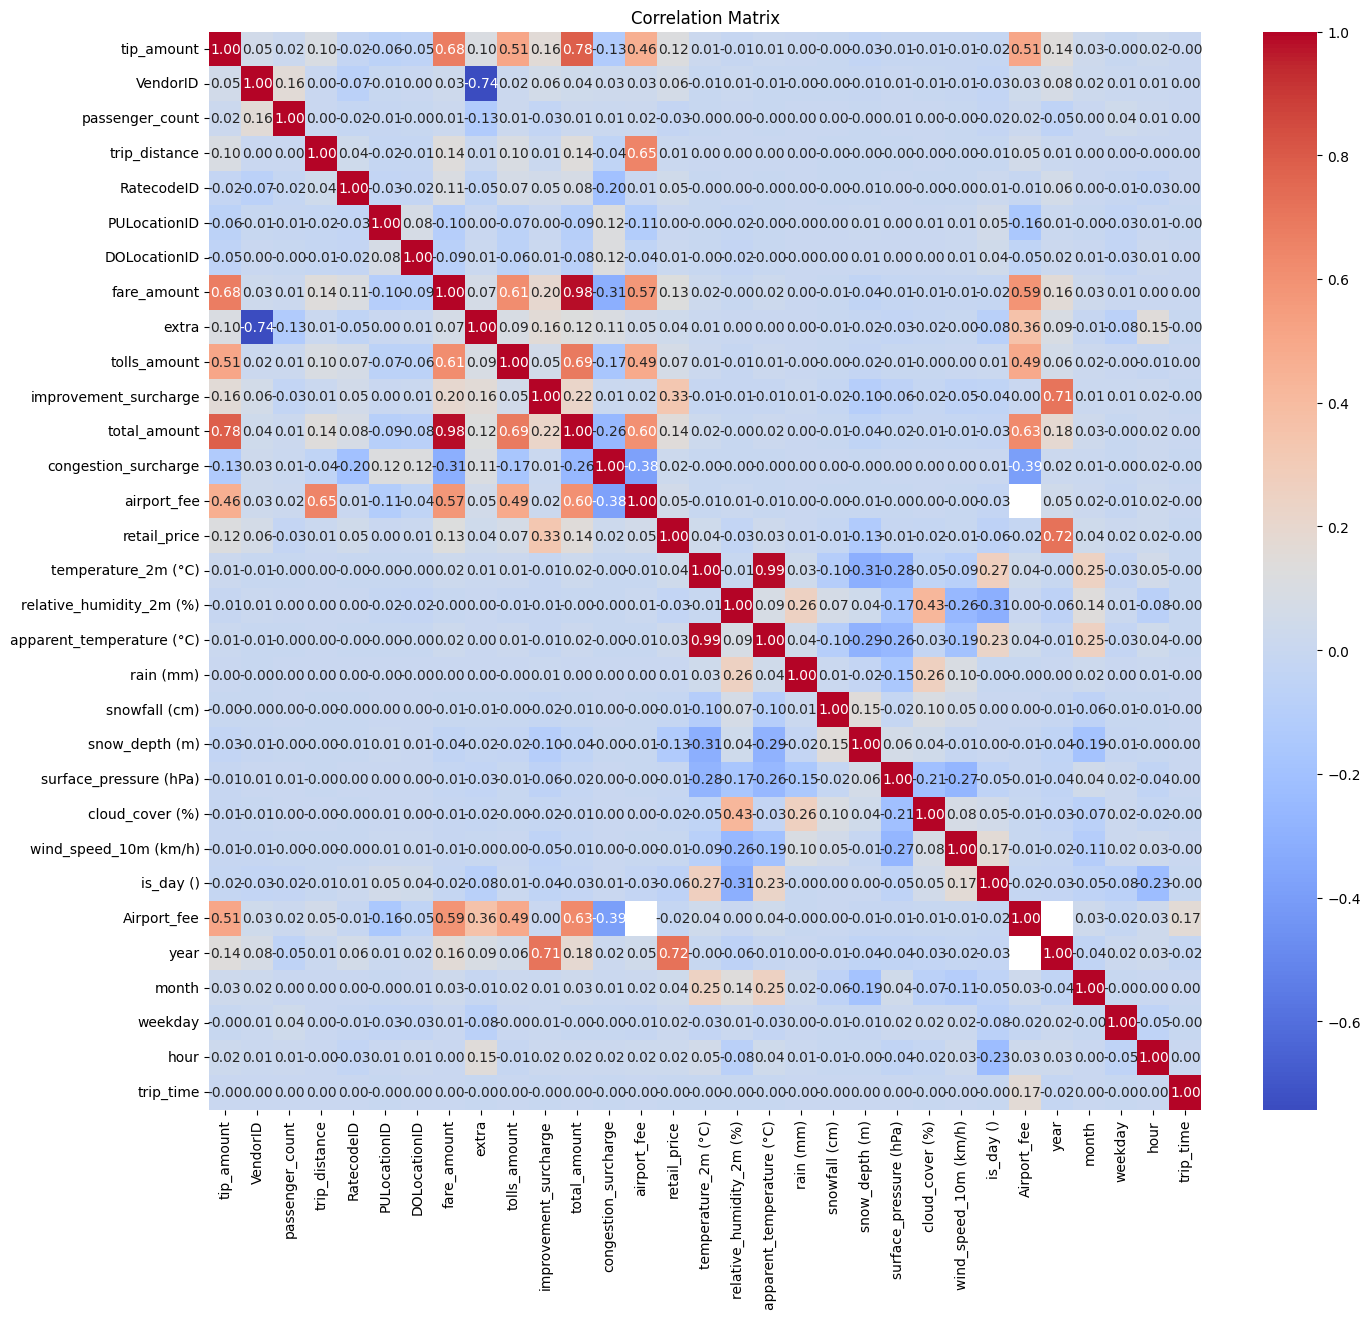

In [141]:
correlation_matrix = choosen_df_sel.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()